# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

# set up lists to hold reponse info
# Some cities might not be found, so need to update the city list
new_city =[]
cloud = []
country = []
date = []
humid = []
# Based on the city search the latitude and longitudes have changed, so need to account for that
new_lat =[]
new_long =[]
max_temp = []
wind_speed = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
# Get data for each city in cities.csv
i = 0
for city in cities:  
    response = requests.get(query_url + city)
    if response.status_code != 200:
            print(f"City not found ...Skipping")
            continue
    else :   
            i = i+1
            print(f"Processing from record number {i} corresponding to {city}")
            print(f"{query_url}+{city}")
            new_city.append(response.json()['name'])
            cloud.append(response.json()['clouds']['all'])
            country.append(response.json()['sys']['country'])
            date.append(response.json()['dt'])
            humid.append(response.json()['main']['humidity'])
            new_lat.append(response.json()['coord']['lat'])
            new_long.append(response.json()['coord']['lon'])
            max_temp.append(response.json()['main']['temp_max'])
            wind_speed.append(response.json()['wind']['speed'])
            
            
            time.sleep(3)
    


Processing from record number 1 corresponding to garden city
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+garden city
Processing from record number 2 corresponding to stanislav
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+stanislav
Processing from record number 3 corresponding to hobart
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+hobart
Processing from record number 4 corresponding to port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+port elizabeth
Processing from record number 5 corresponding to laguna
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+laguna
Processing from record number 6 corresponding to avarua
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc94302748

Processing from record number 49 corresponding to ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+ribeira grande
Processing from record number 50 corresponding to chiang rai
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+chiang rai
Processing from record number 51 corresponding to hayesville
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+hayesville
Processing from record number 52 corresponding to buzmeyin
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+buzmeyin
Processing from record number 53 corresponding to vila velha
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+vila velha
Processing from record number 54 corresponding to taman
http://api.openweathermap.org/data/2.5/weather?appid=309577d

Processing from record number 96 corresponding to komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+komsomolskiy
Processing from record number 97 corresponding to lasa
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+lasa
Processing from record number 98 corresponding to provideniya
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+provideniya
Processing from record number 99 corresponding to kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+kruisfontein
Processing from record number 100 corresponding to alofi
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+alofi
Processing from record number 101 corresponding to marzuq
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc9430

Processing from record number 142 corresponding to port hawkesbury
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+port hawkesbury
Processing from record number 143 corresponding to okakarara
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+okakarara
Processing from record number 144 corresponding to torbay
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+torbay
Processing from record number 145 corresponding to lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+lavrentiya
Processing from record number 146 corresponding to faranah
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+faranah
City not found ...Skipping
Processing from record number 147 corresponding to port-gentil
http://api.openweathermap.org/d

Processing from record number 188 corresponding to deputatskiy
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+deputatskiy
Processing from record number 189 corresponding to lata
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+lata
Processing from record number 190 corresponding to port moresby
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+port moresby
Processing from record number 191 corresponding to te anau
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+te anau
Processing from record number 192 corresponding to pokhara
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+pokhara
City not found ...Skipping
Processing from record number 193 corresponding to fairbanks
http://api.openweathermap.org/data/2.5/weathe

Processing from record number 235 corresponding to raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+raudeberg
Processing from record number 236 corresponding to otta
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+otta
Processing from record number 237 corresponding to eganville
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+eganville
Processing from record number 238 corresponding to vung tau
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+vung tau
Processing from record number 239 corresponding to nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+nanortalik
Processing from record number 240 corresponding to wilmington
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc9430

Processing from record number 282 corresponding to fare
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+fare
City not found ...Skipping
Processing from record number 283 corresponding to geraldton
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+geraldton
Processing from record number 284 corresponding to fountain
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+fountain
Processing from record number 285 corresponding to coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+coquimbo
Processing from record number 286 corresponding to rio gallegos
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+rio gallegos
Processing from record number 287 corresponding to novopokrovka
http://api.openweathermap.org/data/2.5/wea

Processing from record number 329 corresponding to manta
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+manta
Processing from record number 330 corresponding to charters towers
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+charters towers
Processing from record number 331 corresponding to lanzhou
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+lanzhou
Processing from record number 332 corresponding to lobito
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+lobito
Processing from record number 333 corresponding to lancaster
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+lancaster
Processing from record number 334 corresponding to nianzishan
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc

Processing from record number 375 corresponding to george
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+george
City not found ...Skipping
Processing from record number 376 corresponding to tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+tilichiki
Processing from record number 377 corresponding to kavieng
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+kavieng
Processing from record number 378 corresponding to mizdah
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+mizdah
Processing from record number 379 corresponding to polunochnoye
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+polunochnoye
Processing from record number 380 corresponding to bhaderwah
http://api.openweathermap.org/data/2.5/weather?

Processing from record number 422 corresponding to valdez
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+valdez
Processing from record number 423 corresponding to miraflores
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+miraflores
Processing from record number 424 corresponding to antofagasta
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+antofagasta
Processing from record number 425 corresponding to lovington
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+lovington
Processing from record number 426 corresponding to sorland
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+sorland
Processing from record number 427 corresponding to agboville
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66d

Processing from record number 469 corresponding to pitimbu
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+pitimbu
Processing from record number 470 corresponding to lichuan
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+lichuan
Processing from record number 471 corresponding to comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+comodoro rivadavia
Processing from record number 472 corresponding to kavos
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+kavos
Processing from record number 473 corresponding to gat
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+gat
Processing from record number 474 corresponding to haines junction
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66d

Processing from record number 516 corresponding to kandrian
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+kandrian
Processing from record number 517 corresponding to cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+cabedelo
Processing from record number 518 corresponding to katobu
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+katobu
Processing from record number 519 corresponding to aktau
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+aktau
Processing from record number 520 corresponding to amapa
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+amapa
Processing from record number 521 corresponding to mongagua
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units

Processing from record number 564 corresponding to yeppoon
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+yeppoon
Processing from record number 565 corresponding to araouane
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+araouane
Processing from record number 566 corresponding to ranot
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+ranot
Processing from record number 567 corresponding to kyren
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+kyren
Processing from record number 568 corresponding to linxia
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=imperial&q=+linxia
Processing from record number 569 corresponding to redditch
http://api.openweathermap.org/data/2.5/weather?appid=309577dd7c1d66dc943027484a642be9&units=i

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
## create a data frame from cities, lat, and temp
weather_dict = {
    "City": new_city,
    "Cloudiness (%)": cloud,
    "Country" : country,
    "Date" :date,
    "Humidity (%)" : humid,
    "Latitude" : new_lat,
    "Longitude" : new_long,
    "Max Temp": max_temp,
    "Wind Speed (mph)": wind_speed
}

In [6]:

weather_data = pd.DataFrame(weather_dict, index=new_city)
weather_data.to_csv("City_Weather_Data.csv", sep=' ')
weather_data.count()

City                572
Cloudiness (%)      572
Country             572
Date                572
Humidity (%)        572
Latitude            572
Longitude           572
Max Temp            572
Wind Speed (mph)    572
dtype: int64

In [7]:
weather_data.head(10)

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temp,Wind Speed (mph)
Garden City,Garden City,90,US,1556591485,61,40.73,-73.63,52.00,4.70
Stanislav,Stanislav,100,UA,1556589600,100,46.58,32.14,50.00,6.71
Hobart,Hobart,0,AU,1556591595,45,-42.88,147.33,69.01,9.17
Port Elizabeth,Port Elizabeth,90,US,1556591740,100,39.31,-74.98,52.00,4.70
Laguna,Laguna,90,MX,1556588640,30,27.52,-110.01,80.60,4.70
Avarua,Avarua,100,CK,1556589600,74,-21.21,-159.78,80.60,23.04
Wattegama,Wattegama,99,LK,1556591763,75,7.35,80.68,80.36,7.49
Bethel,Bethel,1,US,1556589360,41,60.79,-161.76,59.00,13.87
Castro,Castro,20,CL,1556589600,100,-42.48,-73.76,39.20,2.30
Hilo,Hilo,90,US,1556591747,83,19.71,-155.08,72.00,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

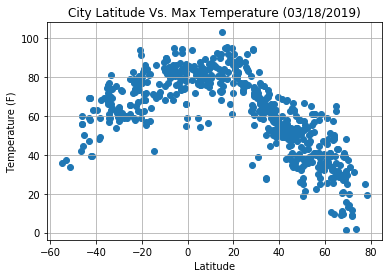

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature (03/18/2019)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temp_Lat.png")

# Show plot
plt.show() 

#### Latitude vs. Humidity Plot

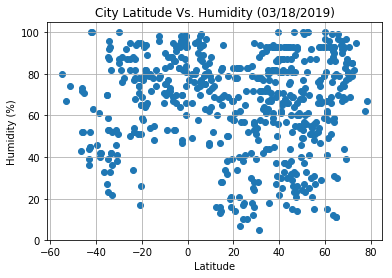

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (03/18/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humid_Lat.png")

# Show plot
plt.show() 

#### Latitude vs. Cloudiness Plot

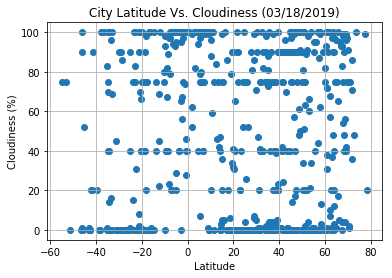

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (03/18/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloud_Lat.png")

# Show plot
plt.show() 

#### Latitude vs. Wind Speed Plot

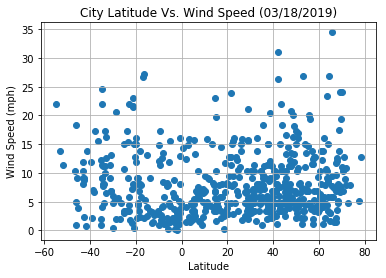

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (03/18/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed.png")

# Show plot
plt.show() 